<a href="https://colab.research.google.com/github/OlegKret/---/blob/master/TwoLayerPerceptron_XOR_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

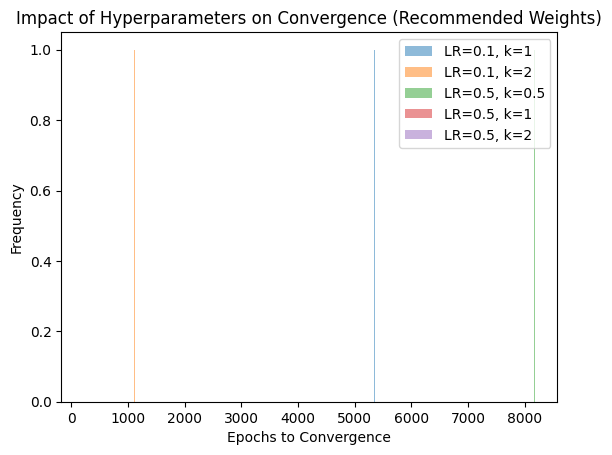

LR=0.01, k=0.5 - Avg. Epochs to Convergence: Did not converge
LR=0.01, k=1 - Avg. Epochs to Convergence: Did not converge
LR=0.01, k=2 - Avg. Epochs to Convergence: Did not converge
LR=0.1, k=0.5 - Avg. Epochs to Convergence: Did not converge
LR=0.1, k=1 - Avg. Epochs to Convergence: 5349.5
LR=0.1, k=2 - Avg. Epochs to Convergence: 1121.5
LR=0.5, k=0.5 - Avg. Epochs to Convergence: 8170.5
LR=0.5, k=1 - Avg. Epochs to Convergence: 1075.5
LR=0.5, k=2 - Avg. Epochs to Convergence: 228.5


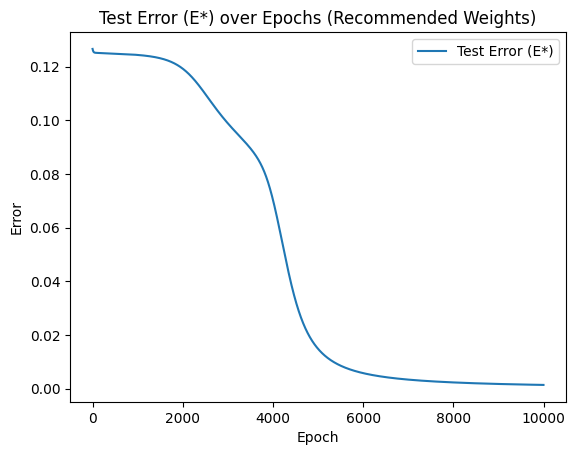

Best Weights and Biases for Each Hyperparameter Combination:

LR=0.1, k=1:
  Weights1: [[ 4.93053     5.60608105]
 [-4.69960404 -5.6588607 ]]
  Bias1: [[ 2.31637109 -3.15496495]]
  Weights2: [[-7.09381283]
 [ 7.35727105]]
  Bias2: [[3.29496598]]

LR=0.1, k=2:
  Weights1: [[ 2.89093958  3.15991651]
 [-2.78628538 -3.20762687]]
  Bias1: [[ 1.39244731 -1.71843661]]
  Weights2: [[-4.5323192 ]
 [ 4.62279582]]
  Bias2: [[2.15840109]]

LR=0.5, k=0.5:
  Weights1: [[  9.26254649  10.73900947]
 [ -8.78140225 -10.82998881]]
  Bias1: [[ 4.28692858 -6.14592693]]
  Weights2: [[-12.94066763]
 [ 13.5817825 ]]
  Bias2: [[5.9279843]]

LR=0.5, k=1:
  Weights1: [[ 5.93194435  6.24091766]
 [-5.71117034 -6.31224528]]
  Bias1: [[ 2.85671638 -3.39612079]]
  Weights2: [[-9.28422353]
 [ 9.50864376]]
  Bias2: [[4.41888274]]

LR=0.5, k=2:
  Weights1: [[ 3.21701189  3.36977721]
 [-3.11340992 -3.42478223]]
  Bias1: [[ 1.55960616 -1.80963163]]
  Weights2: [[-5.35881248]
 [ 5.45974971]]
  Bias2: [[2.5747997]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation function (sigmoid)
def sigmoid(x, k=1):
    return 1 / (1 + np.exp(-k * x))

# Define derivative of sigmoid
def sigmoid_derivative(x, k=1):
    return k * sigmoid(x, k) * (1 - sigmoid(x, k))

# Define neural network class
class XORPerceptron:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, k=1):
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.k = k

    def forward(self, X):
        self.hidden_layer_input = np.dot(X, self.weights1) + self.bias1
        self.hidden_layer_output = sigmoid(self.hidden_layer_input, self.k)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights2) + self.bias2
        y = sigmoid(self.output_layer_input, self.k)
        return y

    def train(self, X, y_true, epochs):
        errors = []
        test_errors = []

        for epoch in range(epochs):
            y_pred = self.forward(X)

            # Backpropagation
            error = y_true - y_pred
            d_weights2 = np.dot(self.hidden_layer_output.T, error * sigmoid_derivative(self.output_layer_input, self.k))
            d_bias2 = np.sum(error * sigmoid_derivative(self.output_layer_input, self.k), axis=0, keepdims=True)
            error_hidden = np.dot(error * sigmoid_derivative(self.output_layer_input, self.k), self.weights2.T)
            d_weights1 = np.dot(X.T, error_hidden * sigmoid_derivative(self.hidden_layer_input, self.k))
            d_bias1 = np.sum(error_hidden * sigmoid_derivative(self.hidden_layer_input, self.k), axis=0)

            # Update weights and biases
            self.weights1 += self.learning_rate * d_weights1
            self.bias1 += self.learning_rate * d_bias1
            self.weights2 += self.learning_rate * d_weights2
            self.bias2 += self.learning_rate * d_bias2

            # Calculate training and test error
            errors.append(0.5 * np.mean(np.power(error, 2)))
            test_errors.append(0.5 * np.mean(np.power(y_true - self.forward(X), 2)))

        return errors, test_errors

# Function to train and evaluate with different initial weights
def evaluate_initial_weights(weights1, bias1, weights2, bias2, num_trials=10, epochs=10000, convergence_threshold=0.01):
    convergence_epochs = []

    for _ in range(num_trials):
        perceptron = XORPerceptron(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1, k=1)
        perceptron.weights1 = weights1.copy()
        perceptron.bias1 = bias1.copy()
        perceptron.weights2 = weights2.copy()
        perceptron.bias2 = bias2.copy()

        _, test_errors = perceptron.train(X, y, epochs)

        # Check for convergence
        for i, error in enumerate(test_errors):
            if error < convergence_threshold:
                convergence_epochs.append(i + 1)
                break

    return convergence_epochs



# Training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Recommended initial weights
recommended_weights1 = np.array([[-0.3, 0.7], [-0.7, -0.1]])
recommended_bias1 = np.array([[-0.5, -0.8]])
recommended_weights2 = np.array([[0.4], [0.8]])
recommended_bias2 = np.array([[-0.2]])

# Function to train and evaluate with different hyperparameters
def evaluate_hyperparameters(learning_rates, k_values, num_trials=10, epochs=10000, convergence_threshold=0.01):
    best_weights = {}  # To store best weights for each (lr, k)
    results = {}

    for lr in learning_rates:
        for k in k_values:
            convergence_epochs = []
            best_test_error = float('inf')  # Initialize with a large value

            for _ in range(num_trials):
                perceptron = XORPerceptron(input_size=2, hidden_size=2, output_size=1, learning_rate=lr, k=k)
                perceptron.weights1 = recommended_weights1.copy()
                perceptron.bias1 = recommended_bias1.copy()
                perceptron.weights2 = recommended_weights2.copy()
                perceptron.bias2 = recommended_bias2.copy()

                _, test_errors = perceptron.train(X, y, epochs)

                # Check for convergence and track best weights
                for i, error in enumerate(test_errors):
                    if error < convergence_threshold and error < best_test_error:
                        best_test_error = error
                        best_weights[(lr, k)] = (perceptron.weights1.copy(), perceptron.bias1.copy(),
                                                perceptron.weights2.copy(), perceptron.bias2.copy())
                        convergence_epochs.append(i + 1)
                        break

            results[(lr, k)] = convergence_epochs

    return results, best_weights


# Define hyperparameters to test
learning_rates = [0.01, 0.1, 0.5]
k_values = [0.5, 1, 2]

# Evaluate hyperparameters
results, best_weights = evaluate_hyperparameters(learning_rates, k_values)

# Plot results
for (lr, k), convergence_epochs in results.items():  # Iterate over dictionary items directly
    if convergence_epochs:  # Check if convergence was achieved
        plt.hist(convergence_epochs, alpha=0.5, label=f"LR={lr}, k={k}", bins=10)
plt.xlabel("Epochs to Convergence")
plt.ylabel("Frequency")
plt.legend()
plt.title("Impact of Hyperparameters on Convergence (Recommended Weights)")
plt.show()

# Summarize results
for (lr, k), convergence_epochs in results.items():
    avg_epochs = np.mean(convergence_epochs) if convergence_epochs else "Did not converge"
    print(f"LR={lr}, k={k} - Avg. Epochs to Convergence: {avg_epochs}")


# Train perceptron with recommended weights to plot E*
perceptron = XORPerceptron(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1, k=1)  # Recommended LR and k
perceptron.weights1 = recommended_weights1.copy()
perceptron.bias1 = recommended_bias1.copy()
perceptron.weights2 = recommended_weights2.copy()
perceptron.bias2 = recommended_bias2.copy()
errors, test_errors = perceptron.train(X, y, epochs=10000)

# Plot E* over epochs (test error)
plt.plot(test_errors, label="Test Error (E*)")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.title("Test Error (E*) over Epochs (Recommended Weights)")
plt.show()

print("Best Weights and Biases for Each Hyperparameter Combination:")
for (lr, k), (weights1, bias1, weights2, bias2) in best_weights.items():
    print(f"\nLR={lr}, k={k}:")
    print("  Weights1:", weights1)
    print("  Bias1:", bias1)
    print("  Weights2:", weights2)
    print("  Bias2:", bias2)